In [179]:
#pd.reset_option('all')

In [180]:
#importing the required libraries
import pandas as pd , numpy as np, matplotlib.pyplot as plt, warnings ,seaborn as sns

In [181]:
#For the output of plotting commands to be displayed inline
%matplotlib inline

#To Suppress Warnings
warnings.filterwarnings("ignore")
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)


In [182]:
loan_df= pd.read_csv("loan.csv")

In [183]:
loan_df.head()

id   member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501     1296599       5000         5000           4975.0   36 months   
1  1077430     1314167       2500         2500           2500.0   60 months   
2  1077175     1313524       2400         2400           2400.0   36 months   
3  1076863     1277178      10000        10000          10000.0   36 months   
4  1075358     1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
4           RENT     80000.0     Source Verified  11-Dec      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2            1-Nov               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.1

In [184]:
loan_df.shape

(39717, 111)

In [185]:
loan_df.columns = loan_df.columns.str.replace(' ', '')

In [186]:
loan_df.dropna(how='all',axis=1,inplace=True)

In [187]:
loan_df.shape

(39717, 57)

In [188]:
data_dict= pd.read_excel("Data_Dictionary.xlsx")
data_dict.dropna(how='all', axis='columns',inplace=True)
data_dict.dropna(how='any', axis='rows',inplace=True)

In [189]:
data_dict.set_index('LoanStatNew',inplace=True)

In [190]:
pd.set_option('max_colwidth', None)
data_dict.loc[loan_df.columns.values]

Description
LoanStatNew                                                                                                                                                                                                                         
id                                                                                                                                                                                     A unique LC assigned ID for the loan listing.
member_id                                                                                                                                                                           A unique LC assigned Id for the borrower member.
loan_amnt                                               The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
funded_amnt                                                                                                                                                           The total amount committed to that loan at that point in time.
funded_amnt_inv                                                                                                                                         The total amount committed by investors for that loan at that point in time.
term                                                                                                                                            The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate                                                                                                                                                                                                   Interest Rate on the loan
installment                                                                                                                                                         The monthly payment owed by the borrower if the loan originates.
grade                                                                                                                                                                                                         LC assigned loan grade
sub_grade                                                                                                                                                                                                  LC assigned loan subgrade
emp_title                                                                                                                                                        The job title supplied by the Borrower when applying for the loan.*
emp_length                                                                                        Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
home_ownership                                                                                                   The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
annual_inc                                                                                                                                             The self-reported annual income provided by the borrower during registration.
verification_status                                                                                                                       Indicates if income was verified by LC, not verified, or if the income source was verified
issue_d                                                                                                                                                                                          The month which the loan was funded
loan_status                                                                                    

In [191]:
pd.reset_option('max_colwidth')

In [192]:
non_driving_variables = ['funded_amnt','funded_amnt_inv','url','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','out_prncp',
                         'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                        'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
                        ]


In [193]:
loan_df.drop(columns=non_driving_variables,axis=1,inplace=True)

In [194]:
loan_df.shape

(39717, 38)

In [195]:
pd.set_option('max_colwidth', None)
data_dict.loc[loan_df.columns.values]

Description
LoanStatNew                                                                                                                                                                                                                         
id                                                                                                                                                                                     A unique LC assigned ID for the loan listing.
member_id                                                                                                                                                                           A unique LC assigned Id for the borrower member.
loan_amnt                                               The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term                                                                                                                                            The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate                                                                                                                                                                                                   Interest Rate on the loan
installment                                                                                                                                                         The monthly payment owed by the borrower if the loan originates.
grade                                                                                                                                                                                                         LC assigned loan grade
sub_grade                                                                                                                                                                                                  LC assigned loan subgrade
emp_title                                                                                                                                                        The job title supplied by the Borrower when applying for the loan.*
emp_length                                                                                        Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
home_ownership                                                                                                   The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
annual_inc                                                                                                                                             The self-reported annual income provided by the borrower during registration.
verification_status                                                                                                                       Indicates if income was verified by LC, not verified, or if the income source was verified
issue_d                                                                                                                                                                                          The month which the loan was funded
loan_status                                                                                                                                                                                               Current status of the loan
pymnt_plan                                                                                                                                                            Indicates if a payment plan has been put in place for the loan
desc                                                                                           

In [196]:
pd.reset_option('max_colwidth')

In [197]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [198]:
## function to plot the pie chart for columns with either 0 or Nan values
def zero_NA_percentage(col):
    col.value_counts(dropna=False).plot.pie(autopct='%.2f',figsize=(4,4))
    plt.show()

### tax_liens - All the values are either 0 or NA

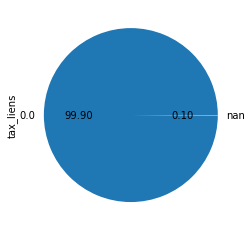

In [199]:
zero_NA_percentage(loan_df['tax_liens'])

In [200]:
loan_df.drop(columns=['tax_liens'],axis=1,inplace=True)

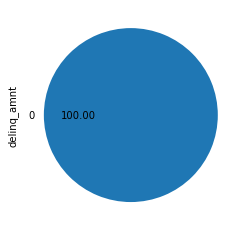

In [201]:
zero_NA_percentage(loan_df['delinq_amnt'])

In [202]:
loan_df.drop(columns=['delinq_amnt'],axis=1,inplace=True)

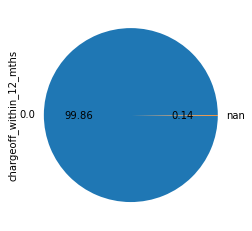

In [203]:
zero_NA_percentage(loan_df['chargeoff_within_12_mths'])

In [204]:
loan_df.drop(columns=['chargeoff_within_12_mths'],axis=1,inplace=True)

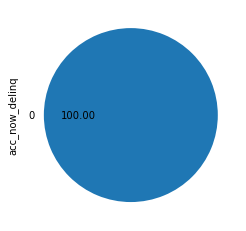

In [205]:
zero_NA_percentage(loan_df['acc_now_delinq'])

In [206]:
loan_df.drop(columns=['acc_now_delinq'],axis=1,inplace=True)

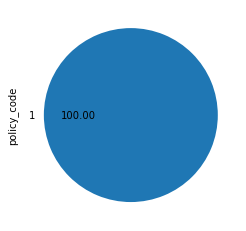

In [207]:
zero_NA_percentage(loan_df['policy_code'])

In [208]:
loan_df.drop(columns=['policy_code'],axis=1,inplace=True)

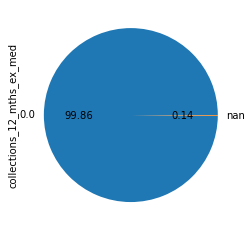

In [209]:
zero_NA_percentage(loan_df['collections_12_mths_ex_med'])

In [210]:
loan_df.drop(columns=['collections_12_mths_ex_med'],axis=1,inplace=True)

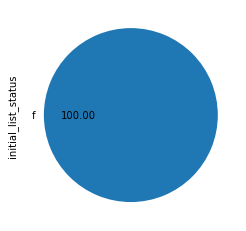

In [211]:
zero_NA_percentage(loan_df['initial_list_status'])

In [212]:
loan_df.drop(columns=['initial_list_status'],axis=1,inplace=True)

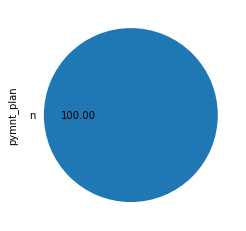

In [213]:
zero_NA_percentage(loan_df['pymnt_plan'])

In [214]:
loan_df.drop(columns=['pymnt_plan'],axis=1,inplace=True)

#### check rows and columns with  missing values
     39717 total entries
     

In [215]:
(len(loan_df.desc)-loan_df.desc.count())/len(loan_df.desc)* 100

32.58050708764509

#### more than 30 % values are missing , so dropping "desc"

In [216]:
loan_df.drop(columns=['desc'],axis=1,inplace=True)

In [217]:
(len(loan_df.mths_since_last_record)-loan_df.mths_since_last_record.count())/len(loan_df.mths_since_last_record)* 100

92.98537150338646

#### more than 90 % values are missing , so dropping "mths_since_last_record"

In [218]:
loan_df.drop(columns=['mths_since_last_record'],axis=1,inplace=True)

##### dropping id and member_id , since they wont be affect any analysis

In [219]:
loan_df.drop(columns=['id'],axis=1,inplace=True)
loan_df.drop(columns=['member_id'],axis=1,inplace=True)

## Final dataframe after data cleaning of missing and empty columns

In [220]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  title                 39706 non-null  object 
 15  zip_code           

In [221]:
pd.set_option('max_colwidth', None)
data_dict.loc[loan_df.columns.values]

Description
LoanStatNew                                                                                                                                                                                                                   
loan_amnt                                         The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term                                                                                                                                      The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate                                                                                                                                                                                             Interest Rate on the loan
installment                                                                                                                                                   The monthly payment owed by the borrower if the loan originates.
grade                                                                                                                                                                                                   LC assigned loan grade
sub_grade                                                                                                                                                                                            LC assigned loan subgrade
emp_title                                                                                                                                                  The job title supplied by the Borrower when applying for the loan.*
emp_length                                                                                  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
home_ownership                                                                                             The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
annual_inc                                                                                                                                       The self-reported annual income provided by the borrower during registration.
verification_status                                                                                                                 Indicates if income was verified by LC, not verified, or if the income source was verified
issue_d                                                                                                                                                                                    The month which the loan was funded
loan_status                                                                                                                                                                                         Current status of the loan
purpose                                                                                                                                                             A category provided by the borrower for the loan request. 
title                                                                                                                                                                                  The loan title provided by the borrower
zip_code                                                                                                                                 The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state                                                                                                                                                          The state provided by the borrowe

In [222]:
pd.reset_option('max_colwidth')

# Data Analysis

In [223]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

###  dropping rows with loan _status as Current , since it doesn't count as fully paid or Charged Off

In [224]:
loan_df=loan_df[~(loan_df.loan_status=='Current')]

In [225]:
loan_df.shape

(38577, 26)

#### putting 1 or 0 for Fully Paid and Charged Off respectively , so that it can be treated for  numerical analysis 

In [226]:
loan_df.loan_status= loan_df.loan_status.apply(lambda x:1 if x=='Fully Paid' else 0)

### converting term to int and trimming months from it

In [227]:
loan_df.term= loan_df.term.apply(lambda x:int(x.split()[0]))

In [228]:
loan_df.term.head()

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64

### converting int_rate to float  and trimming % from it 

In [229]:
loan_df.int_rate= loan_df.int_rate.apply(lambda x:float(x.split('%')[0]))

In [230]:
loan_df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

### converting emp_length to int

In [231]:
loan_df.emp_length.value_counts(dropna=False)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
NaN          1033
Name: emp_length, dtype: int64

In [232]:
loan_df.emp_length=loan_df.emp_length.fillna(value=0)

### Assumptions for emp_length
    - 10+ years = 10
    - <1 year = .5
    - NaN = 0

In [233]:
loan_df.emp_length=loan_df.emp_length.apply(lambda x: float(10) if x=="10+ years" else
                                            ( float(0.5) if x=="< 1 year" else float(str(x).split()[0])))

In [234]:
loan_df.emp_length.head()

0    10.0
1     0.5
2    10.0
3    10.0
5     3.0
Name: emp_length, dtype: float64

### handling date types of issue_d
    - converting into datetime
    - Since all the values are of year 2021, extracting just the month

In [235]:
loan_df.issue_d = pd.to_datetime(loan_df.issue_d,format='%d-%b').dt.month

In [236]:
loan_df.issue_d.value_counts()

12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: issue_d, dtype: int64

#### handling zip_code 
    - extracting the first 3 code from the values
    

In [237]:
loan_df.zip_code= loan_df.zip_code.apply(lambda x:int(x.rstrip('x')))

In [238]:
loan_df.zip_code.head()

0    860
1    309
2    606
3    917
5    852
Name: zip_code, dtype: int64

#### handling earliest_cr_line 
    - extracting just the year , since month will not make much difference
    - some dates are in the format "date-Month" and those are for year 2021

In [240]:
loan_df['earliest_cr_line']= loan_df['earliest_cr_line'].apply(lambda  x : int(str(x).split('-')[1])
                                                               if str(x).split('-')[1].isnumeric()
                                                               else 2021 )

In [241]:
loan_df['earliest_cr_line'].head()

0      85
1      99
2    2021
3      96
5    2021
Name: earliest_cr_line, dtype: int64

### handling revol_util
   

In [242]:
loan_df.revol_util.isna().sum()

50

##### Imputing the data for revol_util
    - since the data is missing , we can put it as 0

In [244]:
loan_df.revol_util.fillna(value=0,inplace=True)
loan_df.revol_util.isna().sum()

0

###### stripping the "%" from all the values

In [245]:
loan_df.revol_util= loan_df.revol_util.apply(lambda x:float(str(x).rstrip('%')))

In [246]:
loan_df.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

### handling application_type
    

In [248]:
loan_df.application_type.value_counts()

INDIVIDUAL    38577
Name: application_type, dtype: int64

###### all the application_type are of "INDIVIDUAL", so they wont be affecting the target variable

In [ ]:
loan_df.drop(columns=['application_type'],axis=1,inplace=True)

## Getting all the numeric columns 

In [251]:
loan_df_intTypes = loan_df.select_dtypes(include = ['float64', 'int64'])
loan_df_intTypes.head()

loan_amnt  term  int_rate  installment  emp_length  annual_inc  issue_d  \
0       5000    36     10.65       162.87        10.0     24000.0       12   
1       2500    60     15.27        59.83         0.5     30000.0       12   
2       2400    36     15.96        84.33        10.0     12252.0       12   
3      10000    36     13.49       339.31        10.0     49200.0       12   
5       5000    36      7.90       156.46         3.0     36000.0       12   

   loan_status  zip_code    dti  earliest_cr_line  open_acc  pub_rec  \
0            1       860  27.65                85         3        0   
1            0       309   1.00                99         3        0   
2            1       606   8.72              2021         2        0   
3            1       917  20.00                96        10        0   
5            1       852  11.20              2021         9        0   

   revol_bal  revol_util  total_acc  pub_rec_bankruptcies  
0      13648        83.7          9                   0.0  
1       1687         9.4          4                   0.0  
2       2956        98.5         10                   0.0  
3       5598        21.0         37                   0.0  
5       7963        28.3         12                   0.0

## Data Analysis
    - Now we will analyze all the individual columns and there affect on the Target variable which is "loan_status"

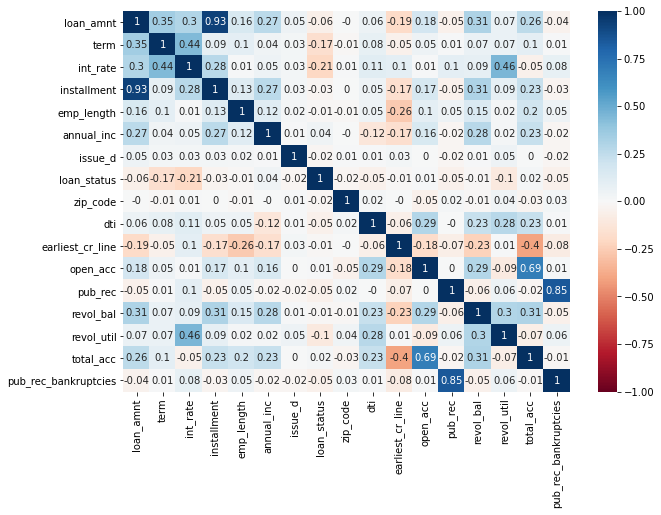

In [252]:
plt.figure(figsize=(10,7))
corrmat = loan_df_intTypes.corr() 
sns.heatmap(round(corrmat,2), cmap='RdBu', annot=True, annot_kws={"size": 10}, vmin=-1, vmax=1); 
plt.show()

## Conclusion:
    - Not much can be inferred from the correlation of loan_status withe other numerical values
    - there are positive as well as negative correlation but the correlation coefficent is very less to derive any useful 
       info

### Univariate Analysis

In [253]:
#loan_amnt
loan_df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### creating another dataframe with records with loan_status as "Charged Off"

In [255]:
loan_df_defaulters= loan_df[loan_df.loan_status==0]

In [256]:
loan_df_defaulters.head()

loan_amnt  term  int_rate  installment grade sub_grade  \
1        2500    60     15.27        59.83     C        C4   
8        5600    60     21.28       152.39     F        F2   
9        5375    60     12.69       121.45     B        B5   
12       9000    36     13.49       305.38     C        C1   
14      10000    36     10.65       325.74     B        B2   

                              emp_title  emp_length home_ownership  \
1                                 Ryder         0.5           RENT   
8                                   NaN         4.0            OWN   
9                             Starbucks         0.5           RENT   
12  Va. Dept of Conservation/Recreation         0.5           RENT   
14                                SFMTA         3.0           RENT   

    annual_inc verification_status  issue_d  loan_status             purpose  \
1      30000.0     Source Verified       12            0                 car   
8      40000.0     Source Verified       12            0      small_business   
9      15000.0            Verified       12            0               other   
12     30000.0     Source Verified       12            0  debt_consolidation   
14    100000.0     Source Verified       12            0               other   

                                   title  zip_code addr_state    dti  \
1                                   bike       309         GA   1.00   
8   Expand Business & Buy Debt Portfolio       958         CA   5.55   
9            Building my credit history.       774         TX  18.08   
12                               freedom       245         VA  10.08   
14                            Other Loan       951         CA   7.06   

    earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
1                 99         3        0       1687         9.4          4   
8               2021        11        0       5210        32.6         13   
9               2021         2        0       9279        36.5          3   
12              2021         4        0      10452        91.7          9   
14                91        14        0      11997        55.5         29   

    pub_rec_bankruptcies  
1                    0.0  
8                    0.0  
9                    0.0  
12                   0.0  
14                   0.0

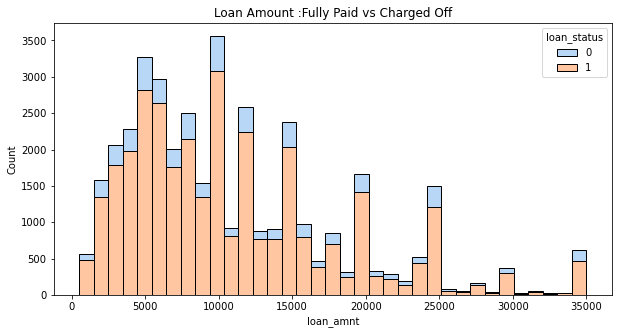

In [294]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)

sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.loan_amnt, kde=False,
             palette="pastel", hue=loan_df.loan_status,
             element="bars", legend=True,bins=35)
ax.set_title("Loan Amount :Fully Paid vs Charged Off")
plt.show()


 - We can see peaks at round amounts like 5000,10000,15000,25000 etc, that means people look out for loans in round amount
 - 10000 is the most favoured amount and 35000 is the max loan amount applied for
 -  not much relation between loan amount and defaulter can be derived
    


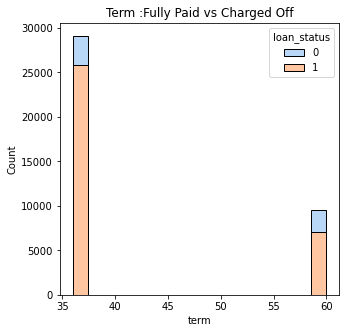

In [284]:
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.term, kde=False,
             palette="pastel", hue=loan_df.loan_status,
             element="bars", legend=True)
ax.set_title("Term :Fully Paid vs Charged Off")
plt.show()

- most of the loans are short term loans
- defaulters doesnt have a direct relationship with terms

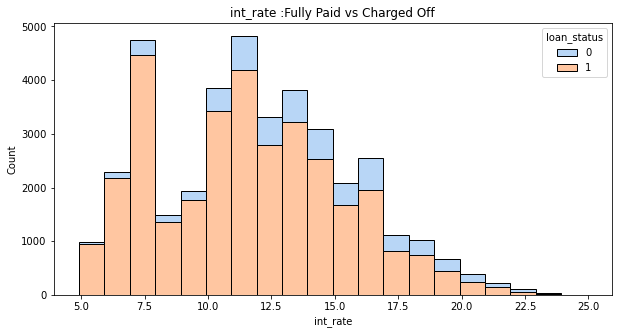

In [295]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)

sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.int_rate, kde=False,discrete=True,
             palette="pastel", hue=loan_df.loan_status,
             element="bars", legend=True)
ax.set_title("int_rate :Fully Paid vs Charged Off")
plt.show()

- almost all the interest rates(low ,medium and high) have defaulters
- not much relation

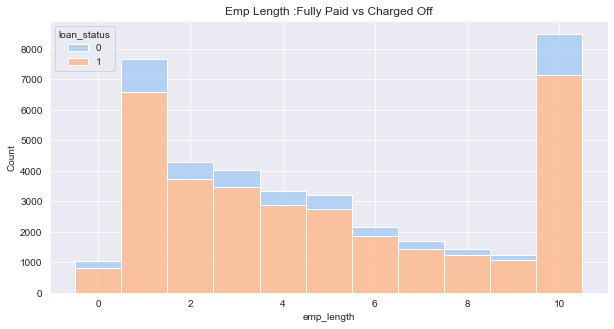

In [304]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.emp_length, kde=False,
             palette="pastel", hue=loan_df.loan_status,discrete=True,
             element="bars", legend=True)
ax.set_title("Emp Length :Fully Paid vs Charged Off")
plt.show()

- most people who took loans have either employment length of "1 and <1" years or "10 and 10+" 
- defaulters are spread out across all the employment length , but more at 1 year and "10 and 10+" 

Text(0.5, 1.0, 'emp_length : Percentage of defaulters ')

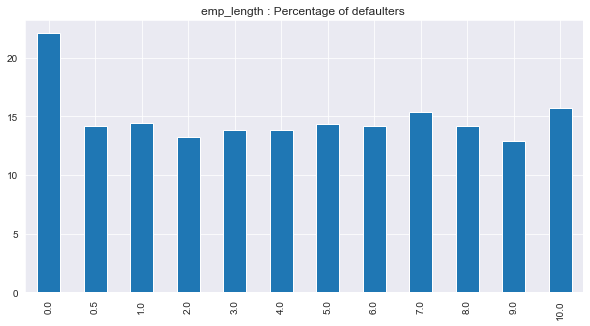

In [328]:
plt.figure(figsize=(10,5))
(loan_df_defaulters.emp_length.value_counts()/loan_df.emp_length.value_counts() * 100).plot.bar()
plt.title("emp_length : Percentage of defaulters ")

- we can see that there are 13-15% defaulters for almost all the emp lengths
- people having 0 years of work exp have the most percentage of defaulters for that section which is around 22%

#### Analysing Annual Income

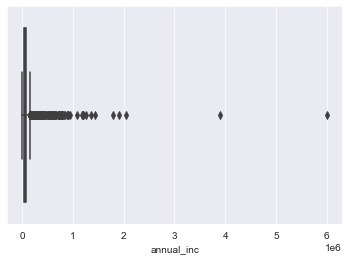

In [341]:
sns.boxplot(loan_df.annual_inc)
plt.show()

- there are a lot of outliers, so we clean the data

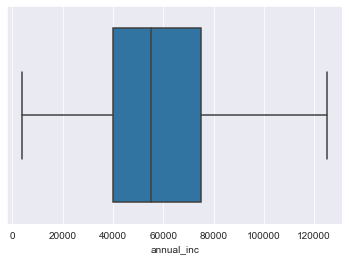

In [363]:
res= loan_df[loan_df.annual_inc < 125000]
sns.boxplot(res.annual_inc)
plt.show()

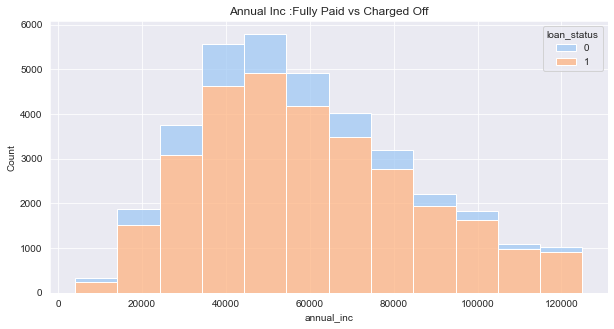

In [369]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=res,ax=ax, stat="count", multiple="stack",
             x=res.annual_inc, kde=False,
             palette="pastel", hue=res.loan_status,bins=12,
             element="bars", legend=True)
ax.set_title("Annual Inc :Fully Paid vs Charged Off")
plt.show()

- we see the defaulters are more in the lower income section specially between 30000-70000 annual Income range

In [89]:
loan_df.annual_inc.describe().apply(lambda x: format(x, 'f'))

count      38577.000000
mean       68777.973681
std        64218.681802
min         4000.000000
25%        40000.000000
50%        58868.000000
75%        82000.000000
max      6000000.000000
Name: annual_inc, dtype: object

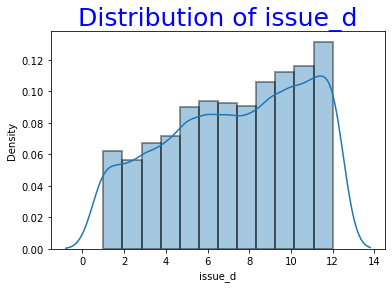

In [90]:
sns.distplot(loan_df_defaulters.issue_d,kde=True,bins=12,hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("Distribution of issue_d",fontsize=25,color="b")
plt.show()

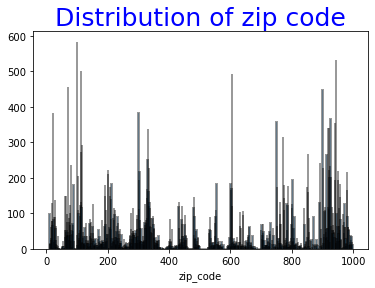

In [91]:
sns.distplot(loan_df.zip_code,kde=False,bins=1000,hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("Distribution of zip code",fontsize=25,color="b")
plt.show()

In [92]:
import plotly.express as px

In [93]:
fig =px.histogram(loan_df_defaulters.zip_code,title="Distribution of Zip Code for defaulters",nbins=1000)
fig.show()

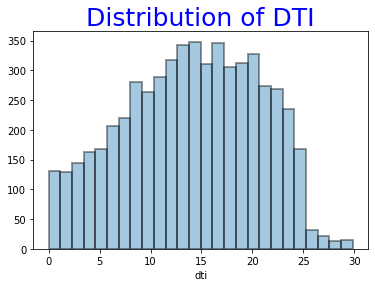

In [94]:
sns.distplot(loan_df_defaulters.dti,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("Distribution of DTI",fontsize=25,color="b")
plt.show()

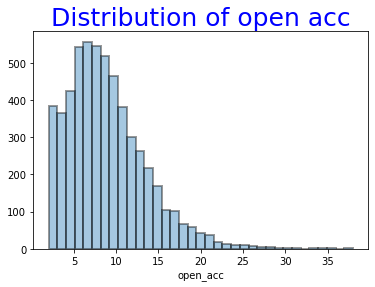

In [95]:
sns.distplot(loan_df_defaulters.open_acc,kde=False,hist_kws=dict(edgecolor="k", linewidth=2),bins=35)
plt.title("Distribution of open acc",fontsize=25,color="b")
plt.show()

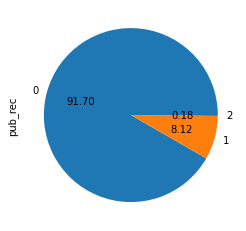

In [96]:
loan_df_defaulters.pub_rec.value_counts(dropna=False).plot.pie(autopct='%.2f',figsize=(4,4))
plt.show()

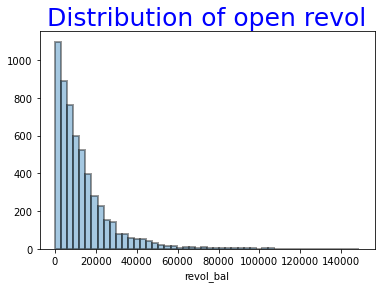

In [97]:
sns.distplot(loan_df_defaulters.revol_bal,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("Distribution of open revol",fontsize=25,color="b")
plt.show() 

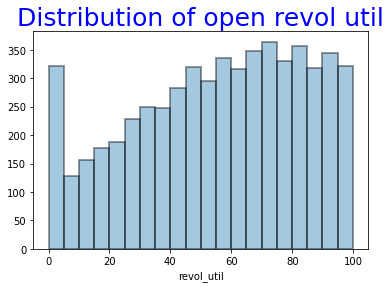

In [98]:
sns.distplot(loan_df_defaulters.revol_util,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("Distribution of open revol util",fontsize=25,color="b")
plt.show()

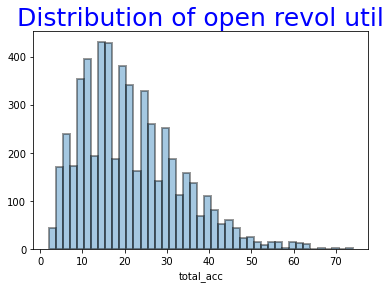

In [99]:
sns.distplot(loan_df_defaulters.total_acc,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("Distribution of open revol util",fontsize=25,color="b")
plt.show()

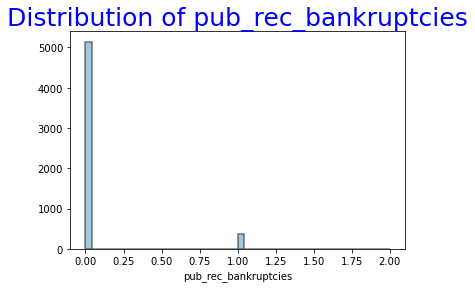

In [100]:
sns.distplot(loan_df_defaulters.pub_rec_bankruptcies,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("Distribution of pub_rec_bankruptcies",fontsize=25,color="b")
plt.show()

In [101]:

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  int64  
 2   int_rate              38577 non-null  float64
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_title             36191 non-null  object 
 7   emp_length            38577 non-null  float64
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  int64  
 12  loan_status           38577 non-null  int64  
 13  purpose               38577 non-null  object 
 14  title                 38566 non-null  object 
 15  zip_code           

<AxesSubplot:>

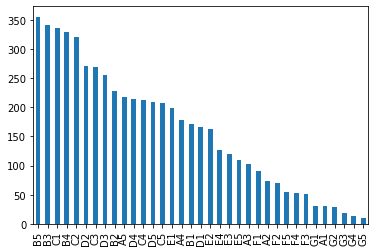

In [102]:
loan_df_defaulters.sub_grade.value_counts().plot.bar()

<AxesSubplot:>

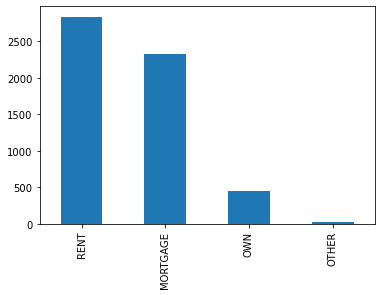

In [103]:
loan_df_defaulters.home_ownership.value_counts().plot.bar()

In [104]:
loan_df_defaulters.verification_status.isna().sum()

0

In [105]:
loan_df_defaulters.title.isna().sum()

2

<AxesSubplot:>

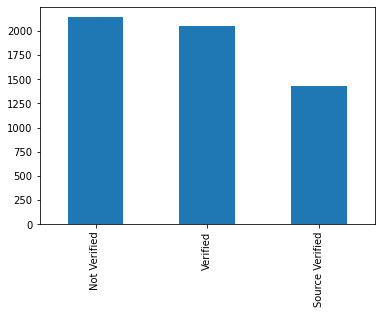

In [106]:
loan_df_defaulters.verification_status.value_counts().plot.bar()

<AxesSubplot:>

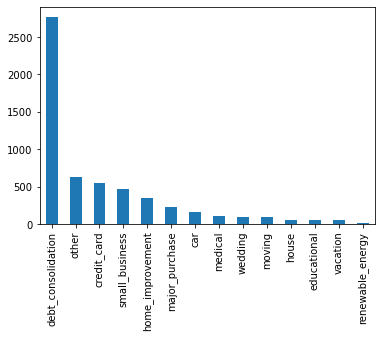

In [107]:
loan_df_defaulters.purpose.value_counts().plot.bar()

<AxesSubplot:>

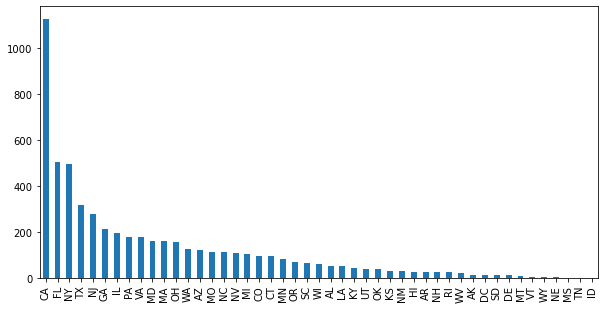

In [108]:
plt.figure(figsize=(10,5))
loan_df_defaulters.addr_state.value_counts().plot.bar()

<AxesSubplot:>

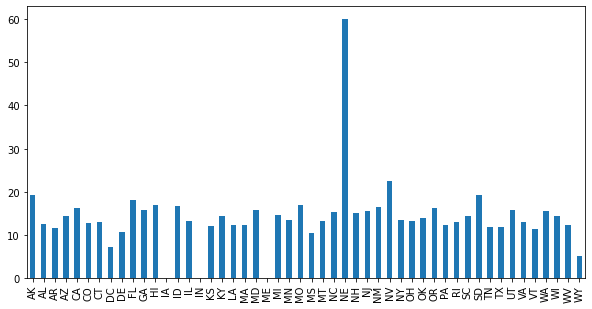

In [109]:
plt.figure(figsize=(10,5))
(loan_df_defaulters.addr_state.value_counts()/loan_df.addr_state.value_counts() * 100).plot.bar()

In [110]:
loan_df[loan_df.addr_state == 'NE']

loan_amnt  term  int_rate  installment grade sub_grade  \
38685       7500    36     12.61       251.30     D        D1   
39500      14400    36     12.80       483.81     D        D4   
39651       4800    36     11.22       157.66     C        C4   
39667       2500    36     12.80        84.00     D        D4   
39668       2500    36      9.64        80.26     B        B4   

                            emp_title  emp_length home_ownership  annual_inc  \
38685                    US Air Force        10.0       MORTGAGE     75000.0   
39500                         Walmart         1.0           RENT     36120.0   
39651  University of Nebraska-Lincoln         5.0           RENT     30000.0   
39667   Nebraska Occupational Therapy         0.5       MORTGAGE     32000.0   
39668                   AMZ Marketing         0.5       MORTGAGE     75000.0   

      verification_status  issue_d  loan_status             purpose  \
38685        Not Verified        5            1  debt_consolidation   
39500        Not Verified       12            0  debt_consolidation   
39651        Not Verified        9            1  debt_consolidation   
39667        Not Verified        8            0    home_improvement   
39668        Not Verified        8            0    home_improvement   

                                         title  zip_code addr_state    dti  \
38685                        Consoladtion Loan       681         NE  20.58   
39500                       Debt Consolidation       689         NE   8.47   
39651  Paying off higher interest credit cards       685         NE  12.36   
39667          Need to put in new countertops.       685         NE  20.00   
39668                        re-model bathroom       685         NE  20.00   

       earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
38685                89        13        0      57633        64.1         34   
39500                 0         7        0       7104        93.5         25   
39651              2021         9        0      12310        86.1         15   
39667                92        11        0       3408        35.1         32   
39668                94         9        0        269         3.8         35   

       pub_rec_bankruptcies  
38685                   0.0  
39500                   NaN  
39651                   NaN  
39667                   NaN  
39668                   NaN